## Exploring Tf-IDF

In this notebook you will be exploring the computation of the Tf-IDF feature using a very popular dataset called 20 newsgroups.

the 20 newsgroups by date dataset
Number of posts 11314


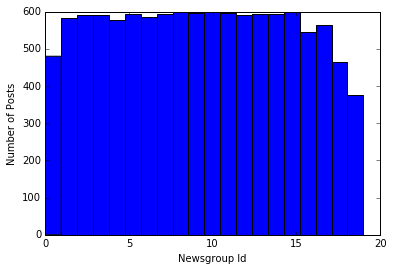

First post!
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [2]:
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

post_texts = data.data
news_group_ids = data.target

print data.description

print "Number of posts", len(data.data)
import matplotlib.pyplot as plt
plt.hist(data.target, bins=20)
plt.xlabel('Newsgroup Id')
plt.ylabel('Number of Posts')
plt.show()

print "First post!"
print data.data[0]

Next, you will be writing a function to compute the term frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).  It's up to you how fancy to make this function.  In my simple version, I used split after first removing leading or trailing punctuation (I used the `strip` function) and also converting the words to lower case.

In [3]:
import string

def tf(text):
    """ Returns a dictionary where keys are words that occur in text
        and the value is the number of times that each word occurs. """
    d = {}
    words = text.split()
    for w in words:
        modified_word = w.lower().strip('.,;!?"()')
        if not modified_word.strip(string.ascii_letters):
            d[modified_word] = d.get(modified_word,0) + 1
    return d

tf(data.data[0])

{u'a': 3,
 u'addition': 1,
 u'all': 1,
 u'anyone': 2,
 u'be': 1,
 u'body': 1,
 u'bricklin': 1,
 u'bumper': 1,
 u'called': 1,
 u'can': 1,
 u'car': 4,
 u'could': 1,
 u'day': 1,
 u'doors': 1,
 u'early': 1,
 u'engine': 1,
 u'enlighten': 1,
 u'from': 2,
 u'front': 1,
 u'funky': 1,
 u'have': 1,
 u'history': 1,
 u'i': 3,
 u'if': 2,
 u'in': 1,
 u'info': 1,
 u'is': 2,
 u'it': 2,
 u'know': 1,
 u'late': 1,
 u'looked': 1,
 u'looking': 1,
 u'made': 1,
 u'me': 1,
 u'model': 1,
 u'name': 1,
 u'of': 2,
 u'on': 2,
 u'or': 1,
 u'other': 1,
 u'out': 1,
 u'please': 1,
 u'production': 1,
 u'really': 1,
 u'rest': 1,
 u'saw': 1,
 u'separate': 1,
 u'small': 1,
 u'specs': 1,
 u'sports': 1,
 u'tellme': 1,
 u'the': 6,
 u'there': 1,
 u'this': 4,
 u'to': 1,
 u'was': 4,
 u'were': 1,
 u'whatever': 1,
 u'where': 1,
 u'wondering': 1,
 u'years': 1,
 u'you': 1}

Next, you will be writing a function to compute the inverse document frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

In [5]:
from math import log
import operator

def idf(data):
    """ Returns a dictionary where the keys are words and the values are inverse
        document frequencies.  For this function you should use the formula
        idf(w, data) = log(N / |text in data that contain the word w|) """
    document_count = {}
    for post in data:
        d = tf(post)
        for k in d:
            document_count[k] = document_count.get(k, 0) + 1
    
    idf = {}
    for key in document_count:
        idf[key] = log(len(data)/float(document_count[key]))
    return idf

idf_dict = idf(data.data)
sorted_idf = sorted(idf_dict.items(), key=operator.itemgetter(1))

print "Lowest IDF (most common)"
for d in sorted_idf[0:10]:
    print d

print ""
print "Highest IDF (least common)"
rev_sorted_idf = sorted(idf_dict.items(), key=operator.itemgetter(1))
for d in reversed(rev_sorted_idf[-10:]):
    print d

Lowest IDF (most common)
(u'the', 0.1783344654369077)
(u'to', 0.2951935671812279)
(u'a', 0.3093035704974311)
(u'and', 0.37938084476550754)
(u'of', 0.38963734493269664)
(u'i', 0.4496015428308278)
(u'in', 0.4708878807844732)
(u'is', 0.4824190783836629)
(u'that', 0.560876083276634)
(u'it', 0.5843807692394498)

Highest IDF (least common)
(u'jawbone', 9.333796175903101)
(u'codings', 9.333796175903101)
(u'anime', 9.333796175903101)
(u'tzeng', 9.333796175903101)
(u'corelations', 9.333796175903101)
(u'echte', 9.333796175903101)
(u'geysers', 9.333796175903101)
(u'crete', 9.333796175903101)
(u'rlequant', 9.333796175903101)
(u'moguls', 9.333796175903101)


### Tf-IDF and Document Classification

Next, you will be using these functions to create a model to classify the newsgroup documents.  Here is an outline of the basic steps you will need to take to do this.

1.  Create a tfidf function that combines your tf and idf function to process a string and returns the TF-IDF features for that string expressed as a Python dictionary.
2.  Create a function that takes a list of strings (a dataset) and returns a matrix consisting of the TF-IDF features for each string expressed as a vector.  This will require you to think about how to map a specific word to a specific element of your vector.  You will have to think about whether to store your data as a sparse or dense matrix.
3.  Use your vectorizer on the news group data.  Then use something like cross_val_score to estimate the performance of your model.  Start with a subset of the data so you get a sense for the training time.  For your classifier, you can try different options.  Some good ones to look at would be Support Vector Classifiers, Logistic Regression, and RandomForests.

In [8]:
def tfidf (data):
    tfVals = tf(data[0])
    idfVals = idf(data)

    tfidf_dict = {}    
    for key in tfVals:
        tfidf_dict[key] = tfVals[key] * idfVals[key]
    return tfidf_dict

print tfidf(data.data)

{u'body': 3.8784750605453997, u'all': 1.2907752906048189, u'the': 1.0700067926214463, u'is': 0.9648381567673258, u'out': 1.5173791922113, u'history': 3.706175062212464, u'it': 1.1687615384788996, u'rest': 3.584403189994848, u'years': 2.5358557629281706, u'production': 5.129103556512135, u'have': 0.773160426644027, u'in': 0.4708878807844732, u'saw': 3.7616421437253367, u'specs': 5.239451613681, u'enlighten': 6.768846818441564, u'anyone': 4.222460314161861, u'from': 2.4110120085920994, u'bricklin': 8.640648995343156, u'there': 1.2930271815355219, u'please': 2.2871488980543453, u'sports': 5.239451613681, u'late': 4.197997738852839, u'to': 0.2951935671812279, u'other': 1.6812504832091804, u'wondering': 4.157646443329272, u'you': 0.8240305003156602, u'really': 2.382981407460517, u'was': 4.994469711314258, u'engine': 4.413815250074976, u'be': 0.8313106133591379, u'doors': 5.527133686132781, u'separate': 4.481765911983484, u'addition': 4.296843573489472, u'early': 3.750299867121402, u'me': 1.